c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

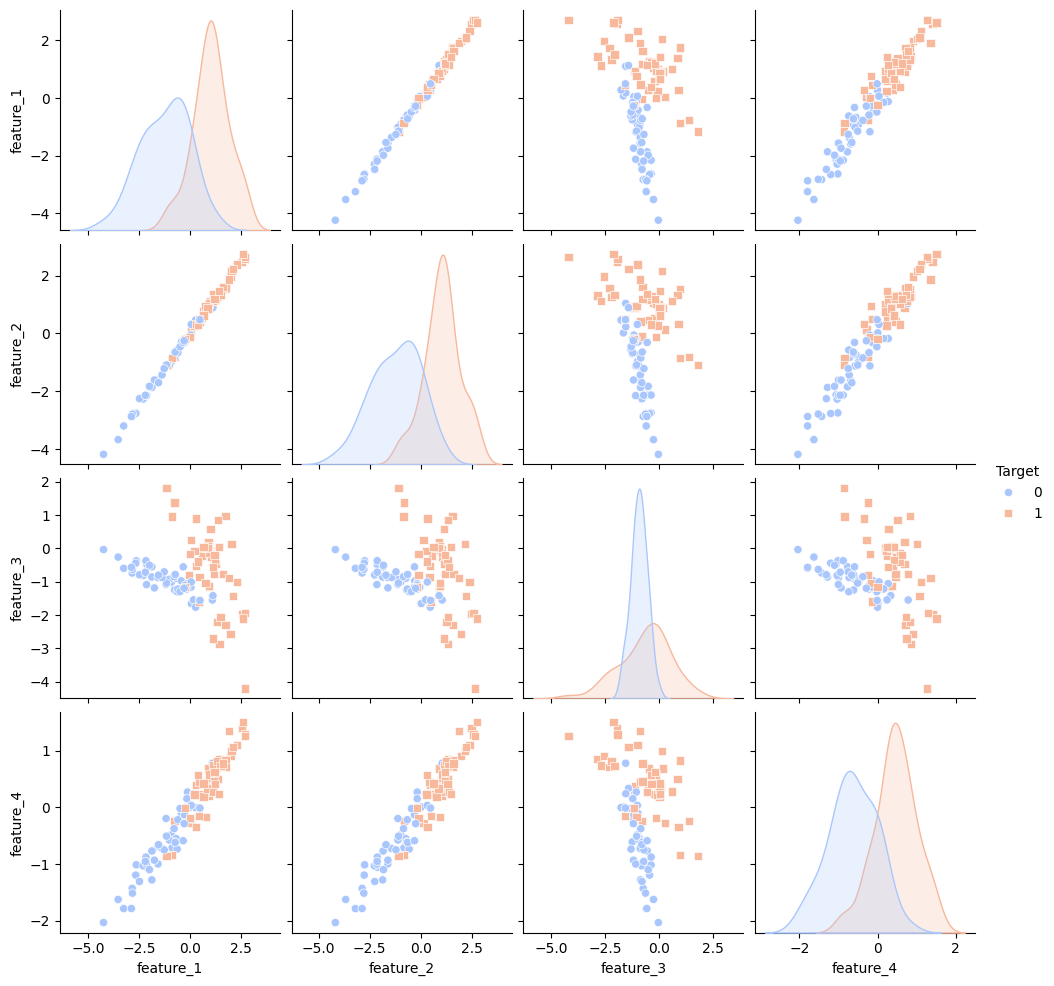

Classification Accuracy for Feature Pairs:
Accuracy with features feature_1 and feature_2: 0.73
Accuracy with features feature_1 and feature_3: 0.87
Accuracy with features feature_1 and feature_4: 0.77
Accuracy with features feature_2 and feature_3: 0.87
Accuracy with features feature_3 and feature_4: 0.90
Accuracy with features feature_2 and feature_4: 0.77


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=100, n_features=5, n_informative=3, n_redundant=1, n_clusters_per_class=1, random_state=42)
feature_names = [f'feature_{i+1}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df['Target'] = y

# Introduce correlation by modifying some features
df['feature_2'] = df['feature_1'] + np.random.normal(0, 0.1, size=df.shape[0])  # Introduce correlation
df['feature_4'] = df['feature_1'] * 0.5 + np.random.normal(0, 0.2, size=df.shape[0])  # Another correlated feature

df_subset = df[['feature_1', 'feature_2', 'feature_3', 'feature_4', 'Target']]

sns.pairplot(df_subset, hue='Target', palette='coolwarm', markers=["o", "s"])
plt.show()

feature_pairs = [
    ('feature_1', 'feature_2'),
    ('feature_1', 'feature_3'),
    ('feature_1', 'feature_4'),
    ('feature_2', 'feature_3'),
    ('feature_3', 'feature_4'),
    ('feature_2', 'feature_4')
]

accuracies = {}

for feature1, feature2 in feature_pairs:
    X = df[[feature1, feature2]]
    y = df['Target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = KNeighborsClassifier(3)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[(feature1, feature2)] = accuracy

print("Classification Accuracy for Feature Pairs:")
for pair, acc in accuracies.items():
    print(f"Accuracy with features {pair[0]} and {pair[1]}: {acc:.2f}")


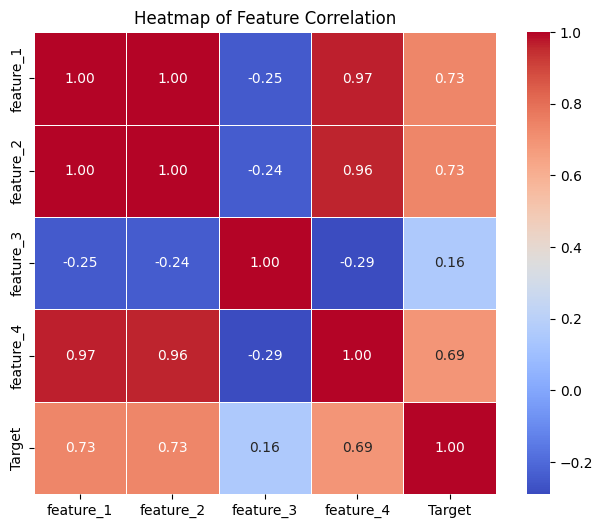

In [3]:
plt.figure(figsize=(8, 6))
correlation_matrix = df_subset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar=True, linewidths=.5)
plt.title('Heatmap of Feature Correlation')
plt.show()